In [1]:
import sqlite3
import numpy as np
import pandas as pd
from IPython.display import display, HTML

DB = '/Users/enkhturbadamsaikhan/CMPE188Sudoku/SudokuWebRipper/puzzler.db'

In [2]:
def load_sudokus(path):
    conn = sqlite3.connect(path)
    c = conn.cursor()
    #c.execute('SELECT * FROM "sudoku" LIMIT 0, 10;')
    c.execute('SELECT * FROM "sudoku";')
    data = c.fetchall()
    names = [member[0] for member in c.description]
    dic = {'Diabolical': 4, 'Hard': 3, 'Medium': 2, 'Easy': 1, 'Ultra Easy': 0}
    data_raw = np.array([row[3:] for row in data]) 
    dataset = {}
    dataset['data'] = data_raw[:,:10]
    dataset['data_cell'] = np.delete(data_raw, np.s_[1:10], 1)
    dataset['data_bool'] = np.clip(data_raw[:,:10], 0, 1)
    dataset['target'] = np.array([dic[name] for name in [row[2] for row in data]])
    dataset['target_names'] = np.array(['Ultra Easy', 'Easy', 'Medium', 'Hard', 'Diabolical'])
    dataset['feature_names'] = names[3:13]
    c.close()
    conn.close()
    return dataset

dataset = load_sudokus(DB)
#print the first 10 results
print(dataset['data'][:10])
print(dataset['data_cell'][:10])
print(dataset['data_bool'][:10])
print(dataset['target'][:10])
print(dataset['target_names'])
print(dataset['feature_names'])


[[ 29 138  23   1   0   0   0   0   0   0]
 [ 31 124  23   0   0   0   0   0   0   0]
 [ 28 127  27   0   1   0   0   3   0   0]
 [ 27 132  25   4   1   0   0   0   2   0]
 [ 33 126   0   0   0   0   0   0   0   0]
 [ 32 116   0   0   0   0   0   0   0   0]
 [ 32  86  45   0   0   0   0   0   0   0]
 [ 30 117  28   3   0   0   0   0   0   0]
 [ 31  95  54   0   0   0   0   0   0   0]
 [ 28 120  39   0   0   0   0   3   0   0]]
[[29 35 15  2  0  0  0  0  0  0]
 [31 37 13  0  0  0  0  0  0  0]
 [28 35 11  0  3  0  0  4  0  0]
 [27 23 10 11  3  0  0  0  7  0]
 [33 48  0  0  0  0  0  0  0  0]
 [32 49  0  0  0  0  0  0  0  0]
 [32 23 26  0  0  0  0  0  0  0]
 [30 32 13  6  0  0  0  0  0  0]
 [31 23 27  0  0  0  0  0  0  0]
 [28 26 23  0  0  0  0  4  0  0]]
[[1 1 1 1 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 0 0 0]
 [1 1 1 0 1 0 0 1 0 0]
 [1 1 1 1 1 0 0 0 1 0]
 [1 1 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 1 0 0]]
[3 2 3 

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    dataset['data'], dataset['target'], random_state=0)

In [4]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (2077, 10)
y_train shape: (2077,)


In [5]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (693, 10)
y_test shape: (693,)


# KNN Classifier for 'data'

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [7]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [8]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [3 2 2 4 2 4 1 1 4 2 3 2 3 4 2 0 2 1 3 2 3 0 2 0 3 3 0 2 3 2 4 0 3 0 1 0 2
 1 4 0 2 3 3 4 3 2 4 3 0 2 3 3 2 4 3 2 2 3 0 2 0 0 3 3 0 2 4 0 4 0 3 3 2 2
 0 3 2 2 1 2 3 2 3 3 3 3 3 2 2 3 4 4 3 0 1 3 3 1 2 2 3 2 2 3 1 3 2 3 3 2 0
 3 1 3 2 1 0 0 3 3 4 2 3 2 3 2 2 3 2 2 1 0 1 3 4 2 1 1 2 1 3 2 0 0 2 1 2 1
 3 2 4 2 3 3 3 3 2 3 4 3 2 4 2 2 3 2 3 3 4 1 3 1 3 3 1 2 0 2 3 3 3 4 0 3 3
 2 2 1 3 3 1 3 3 1 4 3 3 0 1 3 2 3 3 2 2 3 1 3 2 3 1 3 3 1 2 3 2 3 0 3 0 2
 3 4 1 4 4 2 3 1 2 1 3 1 3 2 4 4 4 3 2 2 2 3 4 1 2 0 0 2 4 3 4 0 2 1 3 3 0
 1 4 1 0 3 2 2 1 1 3 3 2 3 3 3 1 0 2 3 1 0 4 2 2 1 1 2 1 2 0 0 3 4 1 3 1 0
 1 3 2 4 2 2 3 3 3 3 0 2 3 0 0 1 1 4 3 4 3 1 2 4 3 2 4 1 3 3 3 1 3 2 1 1 0
 1 3 3 3 3 2 3 1 4 1 2 1 4 3 2 0 2 4 0 2 0 2 3 0 1 3 3 4 2 4 2 3 4 2 1 0 1
 3 2 2 3 2 4 3 3 0 0 2 3 3 2 0 3 1 2 3 0 0 1 4 1 2 3 2 2 2 1 3 0 4 1 4 3 3
 2 1 2 3 0 2 3 2 3 0 1 2 2 3 0 1 0 4 2 3 2 2 0 2 4 3 0 2 1 4 0 4 2 2 4 4 1
 2 0 2 3 3 3 3 3 1 2 4 4 1 2 1 3 2 2 4 1 2 4 2 3 3 1 0 4 1 2 2 2 4 4 0 1 1
 1

In [9]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.85


In [10]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.85


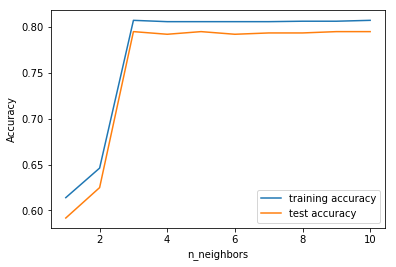

In [68]:
training_accuracy = []
test_accuracy = []

# try n_neighbors from 1 to 10.
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
#plot the results    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

# KNN Classifier for 'data_cell'

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset['data_cell'], dataset['target'], random_state=0)

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))
print(dataset['data_cell'])

Test set score: 0.92
[[29 35 15 ...,  0  0  0]
 [31 37 13 ...,  0  0  0]
 [28 35 11 ...,  4  0  0]
 ..., 
 [29 27 21 ...,  0  0  0]
 [28 26  4 ...,  0  0  0]
 [35 27 19 ...,  0  0  0]]


# KNN Classifier for 'data_bool'

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset['data_bool'], dataset['target'], random_state=0)

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))
print(dataset['data_bool'])

Test set score: 0.79
[[1 1 1 ..., 0 0 0]
 [1 1 1 ..., 0 0 0]
 [1 1 1 ..., 1 0 0]
 ..., 
 [1 1 1 ..., 0 0 0]
 [1 1 1 ..., 0 0 0]
 [1 1 1 ..., 0 0 0]]


# Desicion Tree Classifier for 'data'

In [34]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(
    dataset['data'], dataset['target'], random_state=0)

#build the tree using the training data
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

#Print accuracy of the model
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.998
Accuracy on test set: 0.921


In [13]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file="tree.dot", class_names=dataset['target_names'],
                feature_names=dataset['feature_names'], impurity=True, filled=True)

In [18]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph).render()

'Source.gv.pdf'

# Feature Importance in trees

In [44]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[ 0.71856043  0.03138366  0.18906095  0.01024555  0.01352452  0.0030268   0.
  0.01206645  0.02213164  0.        ]


In [63]:
import matplotlib.pyplot as plt
%matplotlib inline

10


(-1, 10)

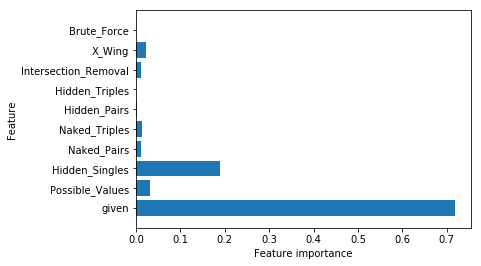

In [64]:
n_features = dataset['data'].shape[1]
print(n_features)
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), dataset['feature_names'])
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)

10


(-1, 10)

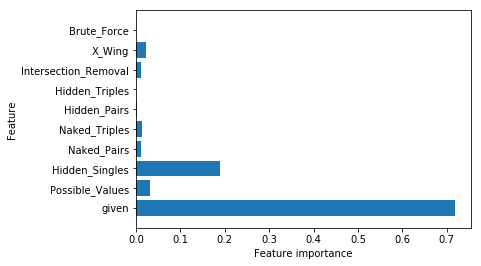

In [65]:
n_features = dataset['data_cell'].shape[1]
print(n_features)
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), dataset['feature_names'])
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)

10


(-1, 10)

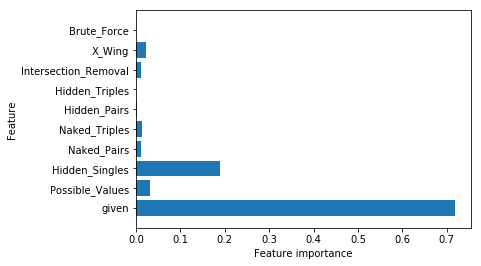

In [66]:
n_features = dataset['data_bool'].shape[1]
print(n_features)
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), dataset['feature_names'])
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)

# Desicion Tree Classifier for 'data_cell'

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset['data_cell'], dataset['target'], random_state=0)

#build the tree using the training data
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

#Print accuracy of the model
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

export_graphviz(tree, out_file="tree.dot", class_names=dataset['target_names'],
                feature_names=dataset['feature_names'], impurity=True, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph).render()

Accuracy on training set: 0.987
Accuracy on test set: 0.924


'Source.gv.pdf'

# Decision Tree Classifier on 'data_bool'

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset['data_bool'], dataset['target'], random_state=0)

In [16]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

#Print accuracy of the model
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.809
Accuracy on test set: 0.795


In [19]:
export_graphviz(tree, out_file="treeBool.dot", class_names=dataset['target_names'],
                feature_names=dataset['feature_names'], impurity=True, filled=True)

with open("treeBool.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph).render()

'Source.gv.pdf'

# Linear Regression

In [37]:
from sklearn import linear_model
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(
    dataset['data'], dataset['target'], random_state=0)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

print('Coefficients: \n', regr.coef_)

print("Mean squared error: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

# Plot outputs
#plt.scatter(X_test, y_test,  color='black')
#plt.plot(X_test, regr.predict(y_test), color='blue',
#         linewidth=3)

#plt.xticks(())
#plt.yticks(())

#plt.show()

Coefficients: 
 [-0.31552809  0.00588418  0.00990562  0.03325004  0.04861615  0.11842484
  0.23749233  0.02538509  0.27559406  0.0323109 ]
Mean squared error: 0.07
Variance score: 0.95


In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset['data_cell'], dataset['target'], random_state=0)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

print('Coefficients: \n', regr.coef_)

print("Mean squared error: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

Coefficients: 
 [-0.35872801 -0.00550817  0.00787932  0.00741885  0.01446911  0.04047261
  0.15250464  0.01146767  0.09892823  0.03109575]
Mean squared error: 0.08
Variance score: 0.95


In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset['data_bool'], dataset['target'], random_state=0)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

print('Coefficients: \n', regr.coef_)

print("Mean squared error: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

Coefficients: 
 [  0.00000000e+00  -5.55111512e-16   1.83025004e+00   9.74895400e-01
   3.57900954e-01   1.58713974e-01   2.36596807e-01   5.78554385e-01
   8.55849257e-01   4.76460540e-01]
Mean squared error: 0.23
Variance score: 0.85


# Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(
    dataset['data'], dataset['target'], random_state=0)

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))
logreg = LogisticRegression().fit(X_train, y_train)
print('Coefficients: \n', logreg.coef_)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Variance score: 0.95
Coefficients: 
 [[  5.27049881e-01  -1.38615209e-01  -6.20712953e-01  -3.27522198e-02
   -6.60262045e-03  -2.32622506e-03  -2.95498552e-05  -1.79328304e-02
   -2.38142835e-03  -3.31244619e-05]
 [  2.10912072e-01  -6.24342698e-02   5.52403050e-02  -1.40835416e+00
   -8.09922954e-01  -3.35494763e-01  -2.03672571e-03  -9.23679119e-01
   -5.86947064e-01  -2.61538290e-02]
 [ -4.26107127e-01   1.01411114e-01   1.12373730e-01  -7.17025610e+00
   -5.56536940e+00  -2.97450823e+00  -1.39727532e-03  -4.09202352e+00
   -4.80398735e+00  -1.97137107e+00]
 [ -4.92537719e-01   8.72162919e-02   4.52831859e-02   5.59610769e-01
    9.77511118e-02  -3.98352667e-01  -1.50207755e+00  -1.59837581e-02
   -3.37255849e+00  -1.27433438e-01]
 [ -7.60862947e-01   1.14318403e-01   8.61389156e-02   2.98657730e-01
    5.75240102e-01   7.92139772e-01   9.73579269e-01   3.75605771e-01
    3.08595625e+00   1.56803661e-02]]
Training set score: 0.900
Test set score: 0.893


In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset['data_cell'], dataset['target'], random_state=0)

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))
logreg = LogisticRegression().fit(X_train, y_train)
print('Coefficients: \n', logreg.coef_)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Variance score: 0.77
Coefficients: 
 [[  6.27023701e-01  -3.94162607e-01  -1.35365826e+00  -5.34148840e-01
   -2.80547785e-01  -5.84489420e-02  -8.09761879e-05  -3.78651170e-01
   -7.89457341e-02  -1.72899095e-04]
 [  6.51850889e-01  -5.64401447e-01  -3.15087784e-01  -9.76391921e-01
   -7.78714154e-01  -3.39339192e-01  -5.64435937e-03  -7.58563777e-01
   -4.95431153e-01  -6.04806615e-03]
 [ -8.35033370e-01   5.59235927e-01   6.54982627e-01  -5.57645712e+00
   -3.82797023e+00  -2.69349611e+00  -1.13831992e-04  -2.99820399e+00
   -3.45930086e+00  -1.92902165e+00]
 [ -7.86002679e-01   4.66888545e-01   4.28803147e-01   6.31357769e-01
    4.12463294e-01   2.14447003e-01  -8.02031299e-01   3.22606227e-01
   -1.05093816e+00   2.37025807e-01]
 [ -2.41232013e+00   1.26596925e+00   1.27008818e+00   1.29092706e+00
    1.34385566e+00   1.61336292e+00   1.08033882e+00   1.30649574e+00
    2.03464471e+00   6.44428775e-01]]
Training set score: 0.915
Test set score: 0.918


In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset['data_bool'], dataset['target'], random_state=0)

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))
logreg = LogisticRegression().fit(X_train, y_train)
print('Coefficients: \n', logreg.coef_)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Variance score: -50.53
Coefficients: 
 [[ 1.08894993  1.08894993 -8.07560098 -1.2184127  -0.46264338 -0.13132497
  -0.01151441 -0.65845135 -0.3744026  -0.02489862]
 [-1.33026268 -1.33026268  3.18943794 -3.77652173 -2.11870499 -0.91674158
  -0.01294336 -2.49785189 -1.69594964 -0.46897536]
 [-1.31151836 -1.31151836  4.52221062 -4.87487383 -3.04886688 -1.53567613
  -0.01143748 -3.04257955 -2.2484325  -0.88580274]
 [-1.40304918 -1.40304918  2.04694173  3.64285924  1.1470752  -0.57553858
  -1.54898574  0.70771145 -4.54898559  0.61798577]
 [-1.63494693 -1.63494693  0.60130137  1.08964552  1.04045455  0.84630548
   0.96859139  2.07540397  4.69096128  0.29010832]]
Training set score: 0.805
Test set score: 0.795
